Loading data from dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from apyori import apriori

data = pd.read_csv('groceries - groceries.csv', sep=',', header=None)

# drop column for number of items
data = data.drop(data.columns[0], axis=1)

# drop first row that is item1, item2, etc.
data = data.drop(data.index[[0]])
data.head()


,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
1,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Transform transactions into lists of items and use transaction encoder

In [2]:
transactions = []
for i in range(0, 9835):
    transactions.append([str(data.values[i, j]) for j in range(0, 32)])
    transactions[i] = list(filter('nan'.__ne__, transactions[i]))

# use transaction encoder
te = TransactionEncoder()
transactions_data = te.fit_transform(transactions)
transactions_data = pd.DataFrame(transactions_data, columns=te.columns_)
transactions_data.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Find number of purchases for each product

In [3]:
purchases = []
# find number of purchases
for c in transactions_data.columns:
    purchases.append(transactions_data[transactions_data[c] == True][c].value_counts()
                     .tolist()[0])

purchases_number = pd.DataFrame([purchases], columns=transactions_data.columns)

# sort products by number of purchases
purchases_most = purchases_number.sort_values(by=0, ascending=False, axis=1)
purchases_least = purchases_number.sort_values(by=0, ascending=True, axis=1)
purchases_least.head()


,sound storage medium,baby food,preservation products,kitchen utensil,bags,baby cosmetics,frozen chicken,toilet cleaner,salad dressing,whisky,...,sausage,shopping bags,tropical fruit,root vegetables,bottled water,yogurt,soda,rolls/buns,other vegetables,whole milk
0,1,1,2,4,4,6,6,7,8,8,...,924,969,1032,1072,1087,1372,1715,1809,1903,2513


Plot most and least purchased products

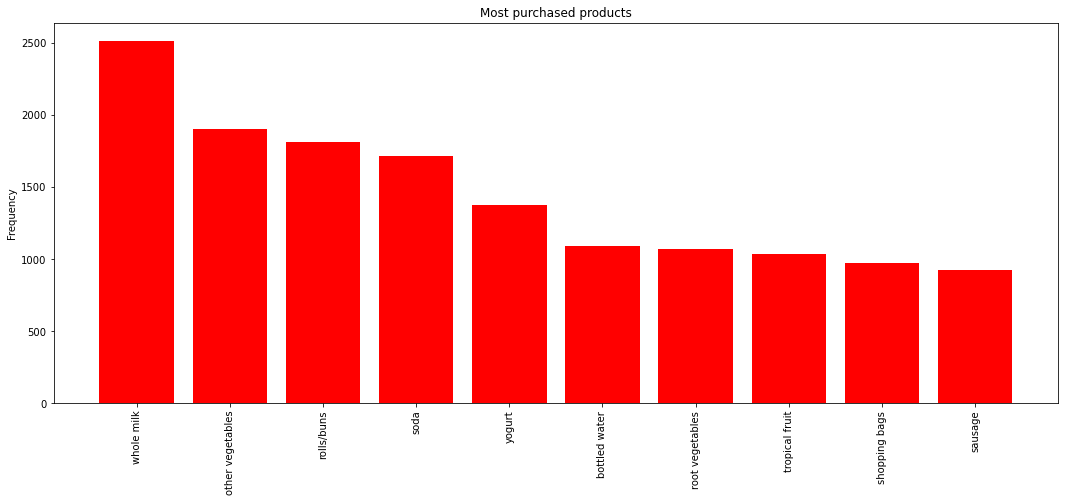

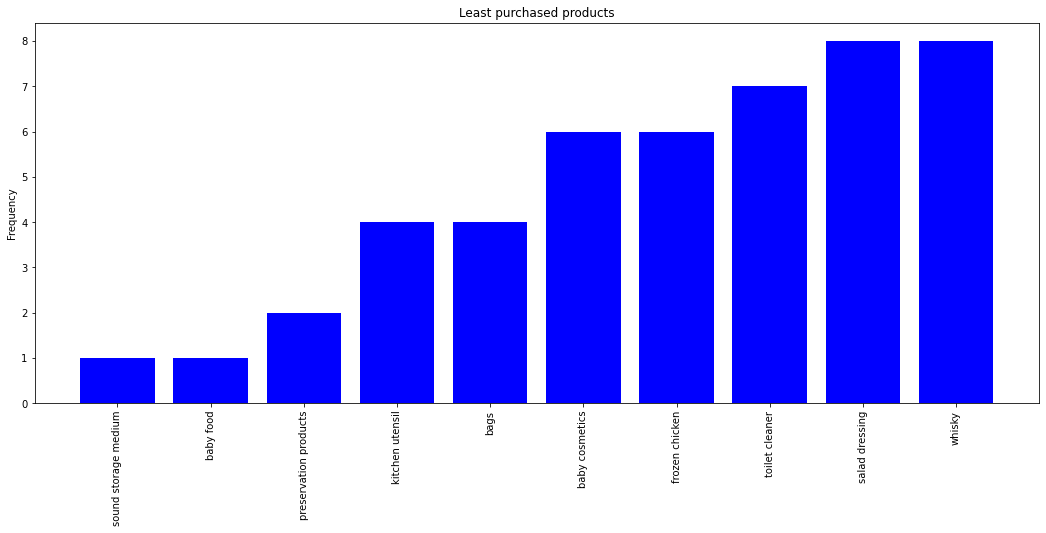

In [4]:
# plot most purchased products
plt.figure(figsize=(18, 7))
plt.ylabel("Frequency")
plt.bar(purchases_most.columns[:10], purchases_most.values[0, :10], color=(1.0, 0.0, 0.0))
plt.xticks(rotation=90)
plt.title("Most purchased products")
plt.show()

# plot least purchased products
plt.figure(figsize=(18, 7))
plt.ylabel("Frequency")
plt.bar(purchases_least.columns[:10], purchases_least.values[0, :10], color=(0.0, 0.0, 1.0))
plt.xticks(rotation=90)
plt.title("Least purchased products")
plt.show()


Frequency of purchased products

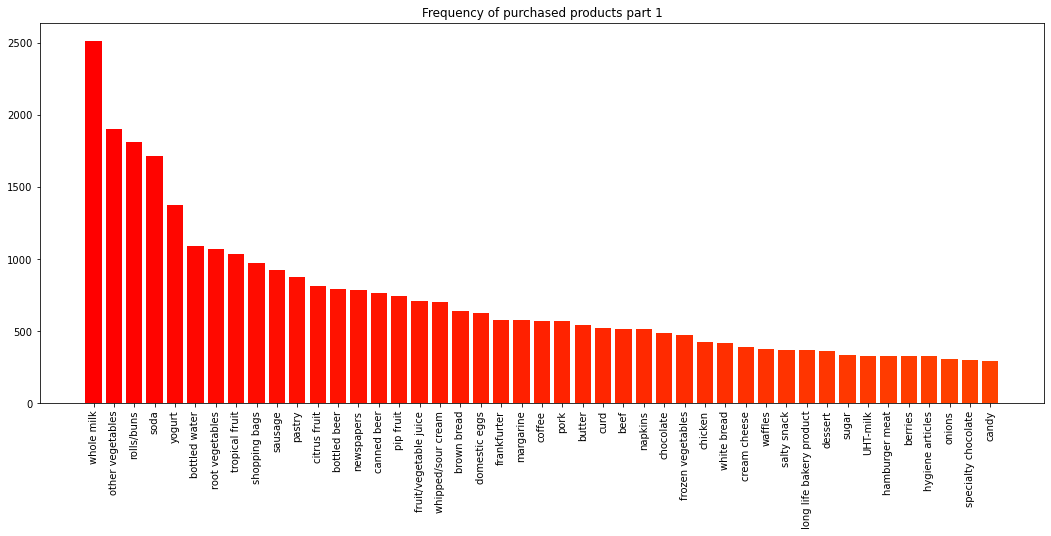

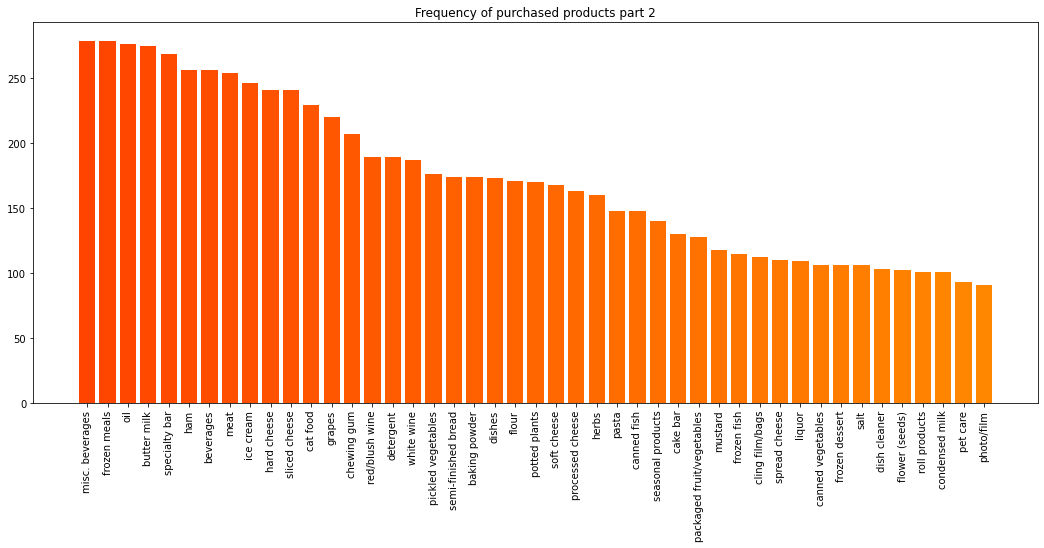

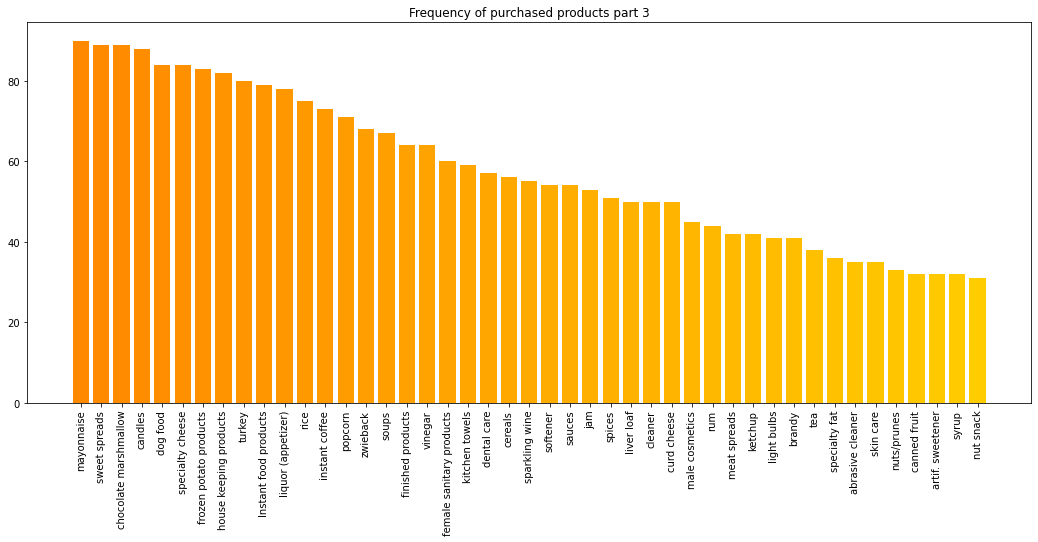

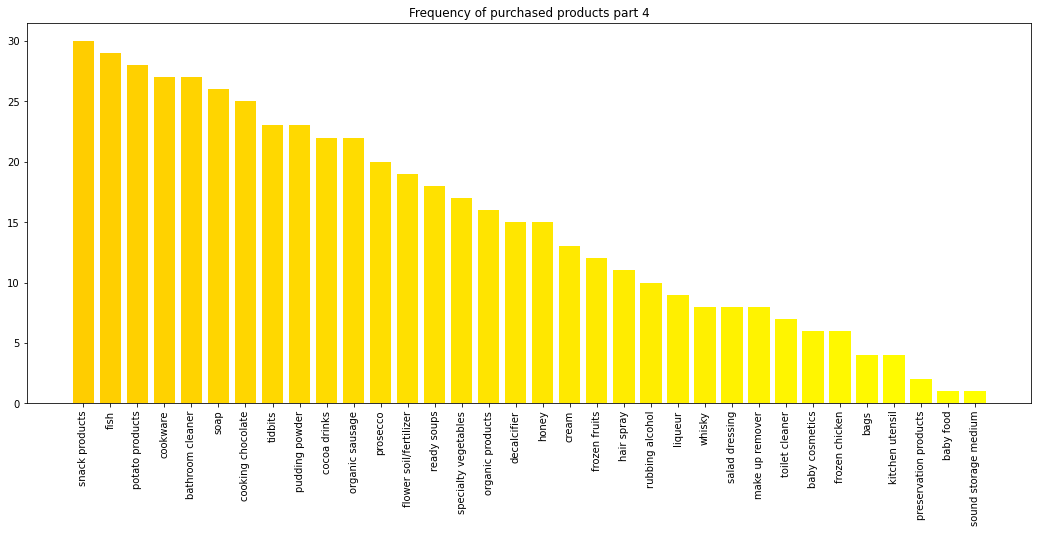

In [5]:
vals = np.linspace(0, 1, 169)

plt.figure(figsize=(18, 7))
color = plt.cm.autumn(vals[:45])
plt.bar(purchases_most.columns[:45], purchases_most.values[0, :45], color=color)
plt.xticks(rotation=90)
plt.title("Frequency of purchased products part 1")
plt.show()

plt.figure(figsize=(18, 7))
color = plt.cm.autumn(vals[45:90])
plt.bar(purchases_most.columns[45:90], purchases_most.values[0, 45:90], color=color)
plt.xticks(rotation=90)
plt.title("Frequency of purchased products part 2")
plt.show()

plt.figure(figsize=(18, 7))
color = plt.cm.autumn(vals[90:135])
plt.bar(purchases_most.columns[90:135], purchases_most.values[0, 90:135], color=color)
plt.xticks(rotation=90)
plt.title("Frequency of purchased products part 3")
plt.show()

plt.figure(figsize=(18, 7))
color = plt.cm.autumn(vals[135:169])
plt.bar(purchases_most.columns[135:169], purchases_most.values[0, 135:169], color=color)
plt.xticks(rotation=90)
plt.title("Frequency of purchased products part 4")
plt.show()


Applying apriori algorithm to find association rules

In [6]:
association_rules = apriori(transactions, min_support=0.01, min_confidence=0.2, 
                            min_lift=2.5, min_length=2)
association_rules = list(association_rules)

for item in association_rules:
    print("Rule: " + str([x for x in item[2][0][0]]) + " -> " + 
          str([x for x in item[2][0][1]]))

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("....................................................")


Rule: ['beef'] -> ['root vegetables']
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
....................................................
Rule: ['pip fruit'] -> ['tropical fruit']
Support: 0.02043721403152008
Confidence: 0.2701612903225806
Lift: 2.5746475681420353
....................................................
Rule: ['butter'] -> ['other vegetables', 'whole milk']
Support: 0.011489578037620742
Confidence: 0.2073394495412844
Lift: 2.7706297367371358
....................................................
Rule: ['other vegetables', 'citrus fruit'] -> ['root vegetables']
Support: 0.010371123538383325
Confidence: 0.3591549295774648
Lift: 3.295045459323103
....................................................
Rule: ['curd', 'whole milk'] -> ['yogurt']
Support: 0.010066090493136757
Confidence: 0.3852140077821012
Lift: 2.761355514968633
....................................................
Rule: ['other vegetables', 'rolls/buns'] -> ['root vegetables']
